<a href="https://colab.research.google.com/github/mihirsathe/ECE285FA18_BestGroup/blob/master/DenseSRGAN_PROTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
dir_pfx = '/content/drive/Team Drives/ECE285_Project/code/prototype/DenseSRGAN/'
data_dir = '/content/drive/Team Drives/ECE285_Project/code/prototype/data/Vehicules1024/'

# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append(dir_pfx)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q imageio
import os
import numpy as np
from matplotlib import pyplot as plt
import utils

Using TensorFlow backend.


In [0]:
onlyfiles = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f)) and "png" in f]

In [0]:
files = utils.scan_dataset([data_dir]) # Requires a list?


The following image is missing!: 00000005


In [0]:
training_set, testing_set = utils.create_subsets(files,data_dir, use_validation = False)

Using 9 images.
Saving files to /content/drive/Team Drives/ECE285_Project/code/prototype/data/Vehicules1024/


In [0]:
print('Training files: ' + str(training_set))
print('Testing files: ' + str(testing_set))


Training files: ['00000006', '00000007', '00000008', '00000004', '00000003', '00000000']
Testing files: ['00000009', '00000001', '00000002']


In [0]:
rgb, infra = utils.read_VEDAI(training_set, [data_dir]) # Directory in list?
print('RGB shape: '+ str(rgb.shape))
print('Infra shape: '+ str(infra.shape))

['00000006', '00000007', '00000008', '00000004', '00000003', '00000000']
(6, 1024, 1024, 3)
RGB shape: (6, 1024, 1024, 3)
Infra shape: (6, 1024, 1024, 1)


In [0]:
training_data = utils.combine_rgb_infra(rgb, infra)
# training_data=rgb
print('Data shape: '+ str(training_data.shape))

Data shape: (6, 1024, 1024, 4)


In [0]:
training_data = utils.normalize(training_data)

In [0]:
data_patched = utils.overlapping_patches(training_data)
patch_size = data_patched.shape[1]
down_patch_size = int(patch_size/4)
print("Patch size " + str(down_patch_size))

Patch size 16


In [0]:
im_hr = np.zeros(data_patched.shape)
im_lr = np.zeros(data_patched.shape)
im_lr = im_lr[:,0:down_patch_size,0:down_patch_size,:]

print('Low res shape: ' + str(im_lr.shape))

Low res shape: (1536, 16, 16, 4)


In [0]:
factor = 4
patch_size = data_patched.shape[1]
down_patch_size = int(patch_size/factor)

for image in range(data_patched.shape[0]):
  im_lr[image,:,:,:] = utils.downsample_image(data_patched[image,:,:,:])

print("Hi res - ")
utils.data_explore(data_patched)
print("Lo res - ")
utils.data_explore(im_lr)

Hi res - 
Shape of the data is(1536, 64, 64, 4)
Dtype of the data isfloat64
Lo res - 
Shape of the data is(1536, 16, 16, 4)
Dtype of the data isfloat64


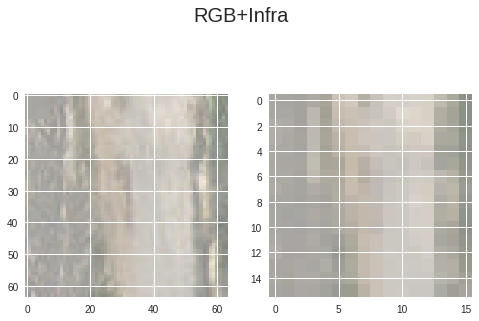

In [0]:
plt.figure().suptitle('RGB+Infra', fontsize=20)
plt.subplot(1,2,1)
plt.imshow(data_patched[0,:,:,:])
plt.subplot(1,2,2)
plt.imshow(im_lr[0,:,:,:])

In [0]:
# Prototype the Dense SR GAN

In [0]:
import DenseSRGAN

In [5]:
gan = DenseSRGAN.DenseSRGAN()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lowres_input (InputLayer)       (None, 16.0, 16.0, 4 0                                            
__________________________________________________________________________________________________
init_conv (Conv2D)              (None, 16.0, 16.0, 6 2304        lowres_input[0][0]               
__________________________________________________________________________________________________
init_bn (BatchNormalization)    (None, 16.0, 16.0, 6 256         init_conv[0][0]                  
__________________________________________________________________________________________________
init_relu (Activation)          (None, 16.0, 16.0, 6 0           init_bn[0][0]                    
__________________________________________________________________________________________________
H1_1_btlnc